# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of the number of points is 100. For the maximum grade you need to get at least _90 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points from the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are four different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-5 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
4. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). **However**, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient!

**Q&A**

Q: If the task is to implement a mean function, may I just call ```np.mean()```? 
<br>A: No.

Q: If the task is to compare the mean of X and Y, may I use ```np.mean()``` to calculate the mean?
<br>A: Yes.

Q: If I have implemented a mean function in a previous task, but I am unsure of its correctness, may I use ```np.mean()``` in following task where mean is used as a helper function? 
<br>A: Yes.

Q: May I use ```np.mean()``` to debug my implementation of mean?
<br>A: Yes.

Q: Do I get 0 points for a task if I skip it?
<br>A: Yes.

Q: Can I get partial points for a task I did partially correct?
<br>A: Yes.

Q: Is it OK to skip a task if I do not need the points from it?
<br>A: Yes.

Q: Should I inform a TA if I find an error?
<br>A: Yes.

Q: Should I ask questions if I am confused?
<br>A: Yes.



Good luck!

In [22]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns


RANDOM_SEED = 132414
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
color_map = {0:'Blue', 1:'Red', 2:'Green'}
toy = df.sample(n=15, random_state=RANDOM_SEED)

# Part 1 Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (4 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (2.2, 0.9) and (2.3,  1.0)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


(1.7855, 2.5444999999999998, 0.5475, 1.2625)

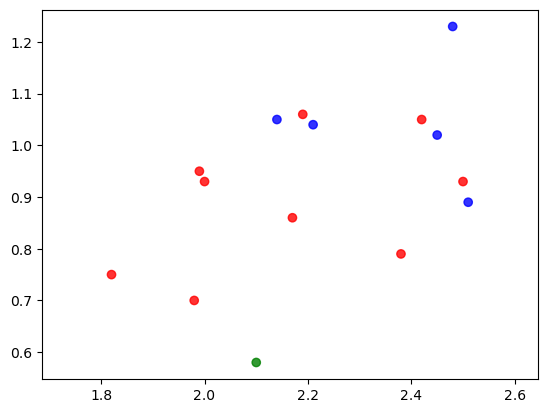

In [26]:
first = 'ash'
last = 'hue'

X_kmeans = toy[[first, last]]

plt.scatter(X_kmeans[first], X_kmeans[last], alpha=0.8, c=toy['target'].map(color_map))
plt.axis('equal')

In [19]:
toy

,ash,hue
117,2.19,1.06
6,2.45,1.02
18,2.48,1.23
91,2.42,1.05
110,1.82,0.75
129,2.38,0.79
39,2.51,0.89
114,2.50,0.93
1,2.14,1.05
116,1.99,0.95


*******************
**YOUR ANSWER HERE**
Calculating the distance from each datapoint to both centroid, and assigning to the closest. Using euclidian distance $$d_p(\mathbf{x}, \mathbf{y})=\sqrt{\sum_{i=1}^d\left|x_i-y_i\right|^2}$$
Considering ash as x, and hue as y.
$c_1=(2.2,0.9), c_2=(2.3,1.0)$
$$


datapoint 117:  
 $d_{c_1}(x,y)=\sqrt{(2.19-2.2)^2+(1.06-0.9)^2}= 0.160$  
$d_{c_2}(x,y)=\sqrt{(2.19-2.3)^2+(1.06-1.0)^2}=0.125$  
Therefor we assign datapoint 117 to $c_2$, since it is closer to that. If we do this for all 15 points of the toy-dataset, we get the following clustering.  
$c_2$ clustering: 117, 6, 18, 91, 129, 39, 114, 29  
$c_1$ clustering: 110, 1, 116, 119, 125, 154, 118

******************

### Task 1.1.2 (3 points)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Using examples, show why the k-means algorithm may not find the global optimum. <br>

*******************
**YOUR ANSWER HERE**

The result depends on the initialization centers. Where the initial centers may end in a local optimum.  

Example in 1d.  

Having a dataset of $\{1,2,3,9\}$ where the first three are one label, and last is another label, with two clusters. If centers are $\{2\}$, $\{8\}$ we end in a global optimum, but if centers are $\{1.5\}$, $\{3.5\}$ we end in a local optimum.


******************

<span style='color: green'>**\[Motivate\]**</span> <br>
B) K-means vs K-medoids: Which performs better when the dataset contains outliers, and why?

*******************
**YOUR ANSWER HERE**
******************

### Task 1.1.3 (4 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **complete-link**.

*******************
**YOUR ANSWER HERE**
******************

### Task 1.1.4 (3 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering DBSCAN for the dataset of Task 1.1.1 using $\epsilon=0.2$ and $MinPts=3$. Present at least 2 iterations of the algorithm<br> 


*******************
**YOUR ANSWER HERE**
******************


B) <span style='color: green'>**\[Motivate\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1.

*******************
**YOUR ANSWER HERE**
******************

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Motivate\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [ ] Angle based approach
- [ ] Depth based approach

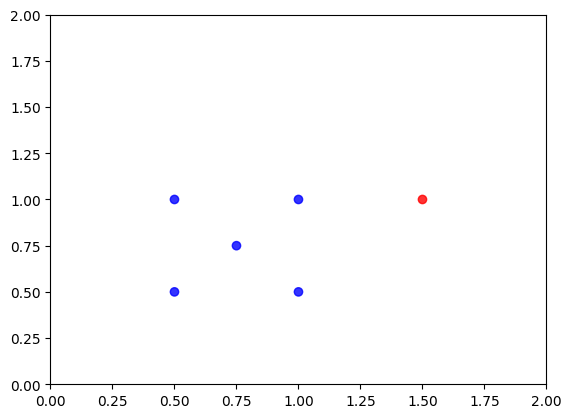

In [5]:
D_new = np.array([[1.5, 1.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0, 2])
plt.show()

*******************
**YOUR ANSWER HERE**
******************

## Task 1.3 Theoretical questions
### Task 1.3.1 Statistical Analysis (3 points)
<span style='color: green'>**\[Prove\]**</span> 1. Prove that the Euclidean distance is a pseudometric.

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Prove\]**</span> 2. Prove that the sample mean is an unbiased estimator of the population mean.

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Prove\]**</span> 3. Prove that the sample variance is an asymptotically unbiased estimator of the population variance.

*******************
**YOUR ANSWER HERE**
******************

### Task 1.3.2 Kernel trick (7 points)
<span style='color: green'>**\[Motivation\]**</span> A) What is a positive-definite kernel $K(x,x')$ of two vectors $x,x'\in\mathbb{R}^n$. 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span> B) Please explain briefly what is the kernel trick method.

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Prove\]**</span> C)
Let two positive-definite kernels $K_1(x,x')$ and $K_2(x,x')$.  <br> Show that functions $K_1(x,x')+K_2(x,x')$ and $K_1(x,x')K_2(x,x')$ are also positive-definite kernels.

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Prove\]**</span> D) Prove that $K(x,x')=e^{2 ln(x^{\top}x')-(x-x')^{\top}(x-x')}$ is a positive-definite kernel. 

*******************
**YOUR ANSWER HERE**
******************

# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>



In [ ]:
toy = df
data_np = toy.to_numpy()
headers = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue','od280/od315_of_diluted_wines', 'proline', 'target']
X = data_np[:,3:]
y = data_np[:,11]
rows, cols = np.shape(X)
toy.head()

## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

In [ ]:
def correlation_matrix(X):
    corr = None
    # YOUR CODE HERE
    
    
    
    # YOUR CODE HERE 
    return corr
    
X = data_np
Corr = correlation_matrix(X)
plt.matshow(Corr)
plt.colorbar()

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in A), which pair(s) of different features has the highest correlation?

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two features are highly correlated? <br>

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the features of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.2 (2 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below. (You may need to zoom on it)
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [ ] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

<font color='red'>Do NOT just choose an answer. Please clarify WHY this is the correct answer.</font>

In [ ]:
df_to_plot = df.drop(['target'],axis=1)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_to_plot.corr(),annot=True,linewidths=1, cmap="YlGnBu", annot_kws={"fontsize":10}, vmax=1, ax=ax)
plt.title('Correlation')
plt.show()

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the wine dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

In [ ]:
# Data
X = data_np

# YOUR CODE HERE


# YOUR CODE HERE

### Task 2.1.4 (2 points)
<span style='color: green'>**\[Motivate\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable within the matrix.
- [ ] Standard score normalization preserves the variance. Therefore, features are directly comparable within the matrix.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other within the matrix. 
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>Do NOT just choose an answer. Please clarify WHY this is the correct answer.</font>

*******************
**YOUR ANSWER HERE**
******************

## Task 2.2 Normal distribution
### Task 2.2.1 (4 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

In [ ]:
from scipy.stats import norm

## Our data comes from the variable X
X = data_np
def norm_dist(x, b): 
    dist = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return dist

### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

*******************
**YOUR ANSWER HERE**
******************

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [ ]:
# YOUR CODE HERE



# YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the features follow a normal distribution?

*******************
**YOUR ANSWER HERE**
******************

### Task 2.2.3 (2 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Motivate\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

In [ ]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape
print(headers, X.shape)
fig = plt.figure(constrained_layout=True, figsize=(8, 50))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(2,n):
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

*******************
**YOUR ANSWER HERE**
******************

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and plot the **silhouette coefficient** to detect the number of clusters $k$. 

<font color='red'>You can use the KMeans implementation from scikit-learn.</font> <br>

In [11]:
toy = df
first = "alcohol"
second = "flavanoids"
X = toy[[first, second]].to_numpy()
y = toy['target']

In [ ]:
# Data
X = toy[[first, second]].to_numpy()
### YOUR CODE HERE


B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

*******************
**YOUR ANSWER HERE**
******************

C) <span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>You can use the KMeans implementation from scikit-learn.</font> <br>

In [ ]:
# Data
X = toy[[first, second]].to_numpy()
### YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span> Did you find better clusters? Are they more separated? Why is it a good/bad idea to use the Silhouette coefficient? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.1.2 (3 points)
<span style='color: green'>**\[Implement\]**</span> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 

In [14]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)
X_scaled = StandardScaler().fit(X_norm).transform(X_norm)

y = df[['target']].to_numpy()

def gaussian_kernel(x,y, sigma=0.2): 
    k = 0 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return k


def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, iters=100, error=0):
    # For simplicity use 'init' as initial points for your algorithm
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++",max_iter=1).fit(X)
    init = kmeans.cluster_centers_

    ### YOUR CODE HERE

        
    ### YOUR CODE HERE
    return clusters

# clusters = kernel_kmeans(X_scaled, 3)
# plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=clusters)

### Task 3.1.3 (3 points)
<span style='color: green'>**\[Motivate\]**</span> Run both kmeans and kernel K-means on the data. 
Which clustering do you think is better and explain why do you think so? Which one most resemble the ground truth labeling? Under which condition is Kernel K-means with Gaussian Kernel better than K-means?

In [ ]:
kmeans_clustering = KMeans(n_clusters=3).fit(X_scaled).labels_
gaussian_clustering = kernel_kmeans(X_scaled, 3, kernel=gaussian_kernel)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.8, c=kmeans_clustering)
axes[0].set_title("K-means")

axes[1].scatter(X[:, 0], X[:, 1], alpha=0.8, c=gaussian_clustering)
axes[1].set_title("Gaussian K-means")

axes[2].scatter(X[:, 0], X[:, 1], alpha=0.8, c=y)
axes[2].set_title("Ground Truth")

*******************
**YOUR ANSWER HERE**
******************

### Task 3.1.4 (4 points)
<span style='color: green'>**\[Motivate\]**</span> Running the code below, draw two example datasets such that:<br>
a). K-means produces clustering better than the one obtained by Gaussian K-means.<br>
b). Gaussian K-means produces clustering better than the one obtained by Vanilla K-means.

Explain why do you think one clustering is better than the other and give the reason why K-means and Gaussian K-means behave this way.

In [ ]:
### You can use this tool to generate the data
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

In [17]:
### Run this code to print data from the tool above
if len(widget.data) != 0:
    data = widget.data_as_pandas[['x', 'y']][:400].to_numpy()
    print(np.array2string(data, precision=0, separator=',', ).replace('\n', ''))


In [ ]:
### You can use this code for plotting. It's just a template you can modify it if you want to.

# Save your example dataset in the array below
X = np.array([])

# Use the line below for debugging, so that you don't have to copy paste data every time
# X = widget.data_as_pandas[['x', 'y']].to_numpy()[:400]

X_norm = (X - X.min(0)) / X.ptp(0)
X_scaled = StandardScaler().fit(X_norm).transform(X_norm)

n_clusters = 2
kmeans_clustering = KMeans(n_clusters=n_clusters, random_state=2137).fit(X_scaled).labels_
gaussian_clustering = kernel_kmeans(X_scaled, n_clusters, kernel=gaussian_kernel)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.8, c=kmeans_clustering)
axes[0].set_title(f"K-means")

axes[1].scatter(X[:, 0], X[:, 1], alpha=0.8, c=gaussian_clustering)
axes[1].set_title(f"Gaussian K-means")

*******************
**YOUR ANSWER HERE**
******************


## Task 3.2 Clustering quality

### Task 3.2.1 (2 points)
<span style='color: green'>**\[Implement\]**</span> **Normalized Mutual Information (NNI)** as a measure for clustering quality.


**Hint**: First implement **Entropy** and then **Normalized Mutual Information**.

In [112]:
### C is the clustering obtained by an algorithm and T is the ground truth cluster assignments.

def entropy(C):
    ### IMPLEMENT
    return None


def NMI(C, T):
    ### IMPLEMENT
    return None

Run the code below to measure the quality of clustering obtained by k-means in task 3.1.3.

In [114]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)
y = df[['target']].to_numpy()


T = y # Ground-truth clusters
C = KMeans(n_clusters=3).fit_predict(X_norm)# Clusters obtained by k-means


print(f'Normalized Mutual Information: {NMI(C, T)}')

Normalized Mutual Information: None


### Task 3.2.2 (4 points)

<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
B) What does the measure capture? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.3 (4 points)
A) <span style='color: green'>**\[Implement\]**</span> functions computing **Purity** and **F-measure** of a clustering and a ground truth labeling.

In [110]:
### C is the clustering obtained by an algorithm and T is the ground truth cluster assignments.


def purity(C, T):
    ### IMPLEMENT
    return None


def f_measure(C, T):
    ### IMPLEMENT
    return None


Run the code below to measure the quality of clustering obtained by k-means in task 3.1.3.

In [ ]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)
y = df[['target']].to_numpy()


T = y # Ground-truth clusters
C = KMeans(n_clusters=3).fit_predict(X_norm)# Clusters obtained by k-means


print(f'Purity: {purity(C, T)}')
print(f'F-measure: {f_measure(C, T)}')

<span style='color: green'>**\[Motivate\]**</span><br>
B) Reason about the differences in the measures, is one more affected by some the characteristics of the clusters (e.g. size, density, radius)? If so, why? What are the drawbacks and advantages of each measure? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.4 (2 points)

<span style='color: green'>**\[Motivate\]**</span><br>

(1) Check the correct box (or boxes) below and (2) motivate your answers.

- [ ] Conditional Entropy is preferable over Entropy because it uses all the points.
- [ ] F-measure is preferable over Purity because it is less computational demanding.
- [ ] Contingency table is always a square matrix.
- [ ] As number of clusters increases Purity tends to 1.

*******************
**YOUR ANSWER HERE**
******************

## Task 3.3 Gaussian Mixtures and the EM-Algorithm
### Task 3.3.1 (4 point)
<span style='color: green'>**\[Implement\]**</span> the EM-algorithm for the Gaussian Mixture Model.
<br> You can consult [DMA] Section 13.3.2, for a description of how the algorithm works in this particular setup.

In [2]:
from utilities.gmm import GMM
class MyGMM(GMM):
    def initialize_parameters(self, X):
        """
            This function should utilize information from the data to initialize
            the parameters of the model.
            In particular, it should compute initial values for mu, Sigma, and pi.
            
            The function corresponds to line 2-4 in Algorithm 13.3 in [DMA, p. 349]
            Note, that K can be retrieved as `self.K`.

            Args:
                X (matrix, [n, d]): Data to be used for initialization.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size     [K, d, d]
                    pi has size        [K]
        """
        # TODO: what should the values be for initializing mu, Sigma and pi
        return mu, Sigma, pi


    def posterior(self, X):
        """
            The E-step of the EM algorithm. 
            Returns the posterior probability p(Y|X)

            This function corresponds to line 8 in Algorithm 13.3 in [DMA, p. 349]
            Note, that mean and covariance matrices can be accessed by `self.mu` and `self.Sigma`, respectively.
            
            Args:
                X (matrix, [n,  d]): Data to compute posterior for.

            Returns:
                Matrix of size        [n, K]
        """
        # TODO: what is the posterior probability?
        
        return posterior
        

    def m_step(self, X, P):
        """
            Update the estimates of mu, Sigma, and pi, given the data `X` and the current
            posterior probabilities `P`.

            This function corresponds to line 10-12 in Algorithm 13.3 and Eqn. (13.11-13) in [DMA, p. 349].
            
            Args:
                X (matrix, [n, d]): Data matrix
                P (matrix, [n, K]): The posterior probabilities for the n samples.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size    [K, d, d]
                    pi has size        [K]
        """
        # TODO: what is the values of mu, Sigma, and pi that maximizes the expectation given the posterior?
        return  mu_hat, Si_hat, pi_hat



### Task 3.3.2 (4 points)

Run both k-means and your EM-algorithm for GaussianMixtures<br> 

In [ ]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)

n_clusters = 3
kmeans_clustering = KMeans(n_clusters=n_clusters).fit_predict(X_norm)

model = MyGMM(K=n_clusters)
model.fit(X_norm)
gmm_clustering = model.predict(X_norm)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.8, c=kmeans_clustering)
axes[0].set_title(f"K-means")

axes[1].scatter(X[:, 0], X[:, 1], alpha=0.8, c=gmm_clustering)
axes[1].set_title(f"EM Gaussian Mixtures")

<span style='color: green'>**\[Motivate\]**</span><br>
A) Can you see the substantial difference between those two clusterings? Explain it.

(*if you don't see any difference try running the algorithm again*)

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
B) What are the advantages and disadvantages of this approach?<br> 

*******************
**YOUR ANSWER HERE**
******************

# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [9]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (2 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

In [10]:
def DBOutliers(X, eps, pi): 
    outliers = None
    ### YOUR CODE STARTS HERE
    
    
    ### YOUR ENDS CODE HERE
    return outliers

### Task 4.1.2 (4 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

In [ ]:
### YOUR CODE HERE

### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
**YOUR ANSWER HERE**
******************

## Task 4.2 Isolation Forest (8 points)

In this section you will recreate implementation of the Isolation Forest from the original paper: https://ieeexplore.ieee.org/abstract/document/4781136.

<span style='color: red'>**Note**: To access the PDF, you must be connected to the university's Wi-Fi or VPN.</span><br>


A) <span style='color: green'>**\[Implement\]**</span> Fill missing parts in the code below.


In [ ]:
def c(n):
    """
    Defined by the equation (1) in the paper.\\
    Computes the expected path length for a given tree size based on the average depth of
    a randomly generated binary search tree.
    
    Parameters:
    -----------
    n (int): The number of data points in the node.
    
    Returns:
    -----------
    float: The expected path length.
    """
    if n <= 1:
        return 0
    ### YOUR CODE STARTS HERE
    

    ### YOUR CODE ENDS HERE
    


class IsolationTree:
    def __init__(self):
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        self.size = 0


    def fit(self, X, e, l):
        """
        Defined by the Algorithm 2 in the paper.\\
        Trains the tree on data X.\\
        It's already implemented for you. Do not modify it.

        Parameters:
        -----------
        X: array-like, shape (n_samples, n_features)
        e: current tree height
        l: height limit

        Returns:
        -----------
        IsolationTree: itself
        """
        self.size = len(X)
        
        if e >= l or self.size <= 1:
            return self
        
        # Choose a random feature and split value
        self.split_feature = np.random.randint(X.shape[1])
        min_val, max_val = X[:, self.split_feature].min(), X[:, self.split_feature].max()
        
        if min_val == max_val:
            return self
        
        self.split_value = np.random.uniform(min_val, max_val)
        
        left_mask = X[:, self.split_feature] < self.split_value
        X_left, X_right = X[left_mask], X[~left_mask]
        
        self.left = IsolationTree().fit(X_left, e + 1, l)
        self.right = IsolationTree().fit(X_right, e + 1, l)
        
        return self
    

    def is_external_node(self):
        """
        Checks whether the tree is an external node.\\
        For the definition of external node ctr+F 'external-node' in the paper.

        Returns:
        -----------
        Boolean: True is the tree is an external node, otherwise, False.
        """
        ### YOUR CODE STARTS HERE
    

        ### YOUR CODE ENDS HERE
        
    

    def path_length(self, x, e=0):
        """
        Defined by the Algorithm 3 in the paper.

        Parameters:
        -----------
        x: array-like, shape (n_features,)
        e: current tree height

        Returns:
        -----------
        int: path length of x
        """
        ### YOUR CODE STARTS HERE


        ### YOUR CODE ENDS HERE


class IsolationForest:
    def __init__(self, n_trees, subsample_size):
        self.n_trees = n_trees
        self.subsample_size = subsample_size
        self.height_limit = np.ceil(np.log2(self.subsample_size))
        self.trees = []


    def fit(self, X):
        """
        Trains the forest on data X.

        Parameters:
        -----------
        X: array-like, shape (n_samples, n_features)
        """
        self.trees = []
        for _ in range(self.n_trees):
            sample = X[np.random.choice(X.shape[0], self.subsample_size, replace=False)]
            tree = IsolationTree().fit(sample, 0, self.height_limit)
            self.trees.append(tree)


    def anomaly_score(self, x):
        """
        Defined by equation (2) in the paper.\\
        Computes the anomaly score of instance x.
        
        Note:
        -----------
        Keep in mind that variable 'n' in the equation in the paper does not represent the size of X but rather the size of a tree i.e. sub-sampling size.
        
        Parameters:
        -----------
        x: array-like, shape (n_features,)

        Returns:
        -----------
        float: the anomaly score of instance x
        """
        ### YOUR CODE STARTS HERE


        ### YOUR CODE ENDS HERE


    def identify_outliers(self, X, threshold=0.5):
        """
        Identifies outliers in the X based on an anomaly score.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        threshold: the cutoff value for determining whether a sample is an outlier.

        Returns:
        -----------
        outliers : array-like, shape (n_samples,)\\
        A boolean array where each element corresponds to a sample in X.\\
        True indicates that the anomaly score of the sample is greater than the threshold.
        """
        ### YOUR CODE STARTS HERE


        ### YOUR CODE ENDS HERE


B). <span style='color: green'>**\[Implement\]**</span> Create an Isolation Forest with $n\_trees = 100$, $subsample\_size = 50$ and train it on $X$. Then, use the Isolation Forest to find outliers in $X$ and plot the result. You might need to fine-tune parameter $threshold$ so that the result is meaningful.

In [ ]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)

### YOUR CODE STARTS HERE


### YOUR CODE ENDS HERE

C) <span style='color: green'>**\[Motivate\]**</span> Present the results and discuss what you found and what is the impact of $threshold$.

*******************
**YOUR ANSWER HERE**
******************